<a href="https://colab.research.google.com/github/mohamedamr13/gmc/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


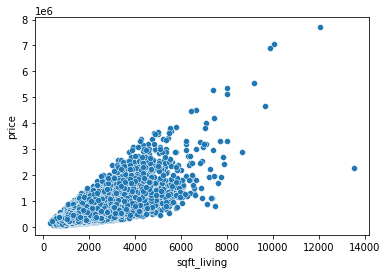

In [6]:
sns.scatterplot( x = 'sqft_living' , y = 'price' , data = df )


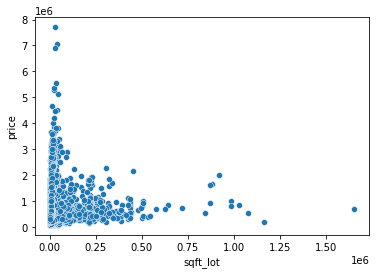

In [7]:
sns.scatterplot( x = 'sqft_lot' , y = 'price' , data = df )


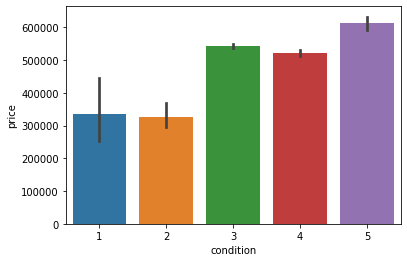

In [9]:
sns.barplot( x = 'condition' , y = 'price' , data = df )


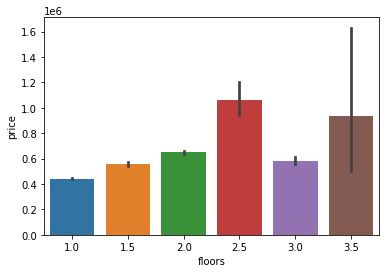

In [10]:
sns.barplot( x = 'floors' , y = 'price' , data = df )


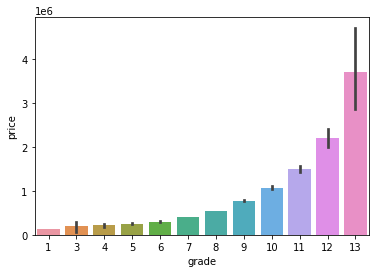

In [22]:
sns.barplot( x = 'grade' , y = 'price' , data = df )


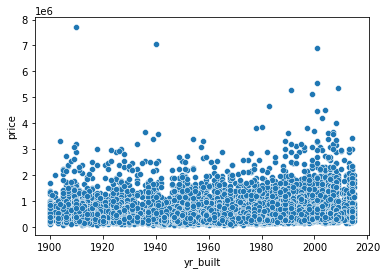

In [16]:
sns.scatterplot( x = 'yr_built' , y = 'price' , data = df )


In [17]:
df['size'] = df['sqft_above']+df['sqft_basement']+df['sqft_living']

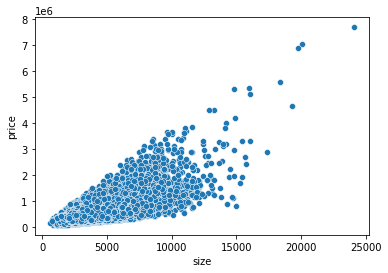

In [35]:
df.drop( df [ df['size'] > 25000 ].index , inplace= True )
sns.scatterplot( x = 'size' , y = 'price' , data = df )


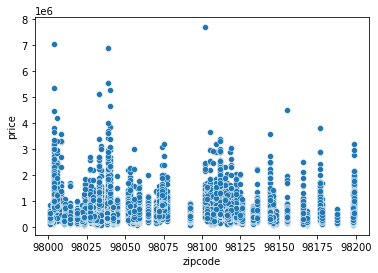

In [32]:
# sns.boxplot( df['zipcode'] )
t = df[ df['grade'] > 5 ]
sns.scatterplot( x = 'zipcode' , y = 'price' , data = t )


# Feature Selection
From the data distribution , it is apparent that the grade is the most critical feature that affects the price. 

The size , floor and the number of bedroom , bathroom , and conidtion weakly affect the price , but combined they can provide a modestly accurate estimation of price 

# Data Splitting

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x=df[["size"]]
y=df["price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=40) #splitting data with test size of 35%



In [48]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62563901826.981316
R squared 0.4978710188981459


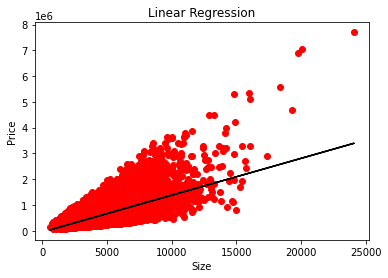

In [46]:
plt.scatter( df['size'] , df['price'] ,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Size")
plt.plot( x ,  model.predict(x),color="k")
plt.show()



# AFTER REMOVING OUTLIERS

In [52]:
noOutliers = df[ df['size'] < 15000 ]
len(noOutliers)

21598

In [53]:

x=noOutliers[["size"]]
y=noOutliers["price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=40) #splitting data with test size of 35%



In [54]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 58926130233.22475
R squared 0.4679862762383691


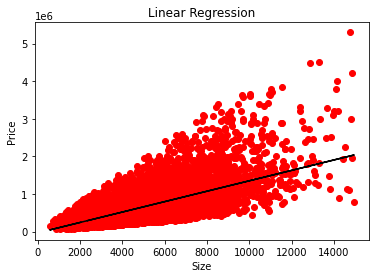

In [55]:
plt.scatter( noOutliers['size'] , noOutliers['price'] ,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Size")
plt.plot( x ,  model.predict(x),color="k")
plt.show()



Multi-Linear Regression with Size,  grade , and condition included 

In [64]:
x=df[["size","grade" , "condition"]]  #we have more than one input
y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 54960611039.374084
R squared 0.5514149468876463


Multilinear showed a better accuracy with an R-squared of 0.55 , which is 0.6 better than the Linear Model 

# Polynomial Regression 


In [72]:
from sklearn.preprocessing import PolynomialFeatures 
x= df[["grade" , "condition" , "size"]]
y= df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  45636484550.38893
R squared:  0.6275178812835398


In [66]:

from sklearn.preprocessing import PolynomialFeatures 
x= df[["grade" , "condition"]]
y= df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  56562350192.02965
R squared:  0.5383416525905471


In [68]:
from sklearn.preprocessing import PolynomialFeatures 
x= df[["grade"]]
y= df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  60579766685.37626
R squared:  0.5055517516603835


Single Polynomial Regression using only grade as a feature showed improving accurracy than linear but 0.5 less than multilinear r2 score that included 3 featueres

The polynomial model with the 3 features : grade , condition , and size increased the r2 score to 0.62 which is the most accurate model so far 